In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [2]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.7.1+cpu (CPU)


In [ ]:
# Fashion dataset from kaggle
# https://www.kaggle.com/datasets/nguyngiabol/colorful-fashion-dataset-for-object-detection
images_path = 'colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path = 'colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = 'colorful_fashion_dataset_for_object_detection/'

In [4]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\XMEDIA\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:16<00:00, 3.21MB/s]


In [7]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [8]:
len(train), len(test)

(2145, 537)

In [9]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [11]:
train_path = 'train/'
test_path = 'test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:22<00:00, 95.16it/s] 


Copying Test Data..!!


100%|██████████| 537/537 [00:05<00:00, 90.88it/s] 


In [12]:
text = """
train: train
val: test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [13]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

Ultralytics 8.3.150  Python-3.12.0 torch-2.7.1+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

100%|██████████| 755k/755k [00:00<00:00, 3.86MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning D:\Noel\flickd\train\labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:02<00:00, 801.44it/s]


train: New cache created: D:\Noel\flickd\train\labels.cache
val: Fast image access  (ping: 0.00.0 ms, read: 10.62.3 MB/s, size: 41.2 KB)


d:\Noel\flickd\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning D:\Noel\flickd\test\labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 752.47it/s]

val: New cache created: D:\Noel\flickd\test\labels.cache



d:\Noel\flickd\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G       1.32      1.846      1.428          9        640: 100%|██████████| 135/135 [41:34<00:00, 18.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:36<00:00,  9.21s/it]

                   all        537       2035      0.575      0.662      0.641      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.238      1.235      1.356          7        640: 100%|██████████| 135/135 [40:52<00:00, 18.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:28<00:00,  8.75s/it]

                   all        537       2035      0.661      0.649      0.676      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.221      1.145      1.348          6        640: 100%|██████████| 135/135 [40:44<00:00, 18.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:28<00:00,  8.71s/it]

                   all        537       2035      0.709      0.725      0.719      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.198      1.064      1.336         17        640: 100%|██████████| 135/135 [3:11:51<00:00, 85.27s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:31<00:00,  8.90s/it]

                   all        537       2035      0.702      0.771      0.763      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.122     0.9346      1.299         13        640: 100%|██████████| 135/135 [2:35:40<00:00, 69.19s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:28<00:00,  8.75s/it]

                   all        537       2035      0.698      0.766      0.778      0.527



5 epochs completed in 8.059 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train\weights\best.pt, 52.0MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.150  Python-3.12.0 torch-2.7.1+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:12<00:00,  7.79s/it]


                   all        537       2035      0.696      0.766      0.778      0.526
              sunglass         82         82       0.59      0.183       0.32     0.0944
                   hat         77         77      0.586      0.818       0.77      0.453
                jacket        179        181       0.77      0.812      0.859      0.654
                 shirt        361        366      0.756      0.861      0.835      0.591
                 pants        114        114       0.83      0.947      0.966      0.754
                shorts        107        107      0.786      0.822      0.844      0.565
                 skirt        186        186       0.73      0.743      0.784      0.623
                 dress        128        128      0.539      0.906      0.824      0.645
                   bag        274        274      0.647      0.741      0.764      0.419
                  shoe        520        520      0.726      0.827      0.816      0.465
Speed: 2.0ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AA1442C830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

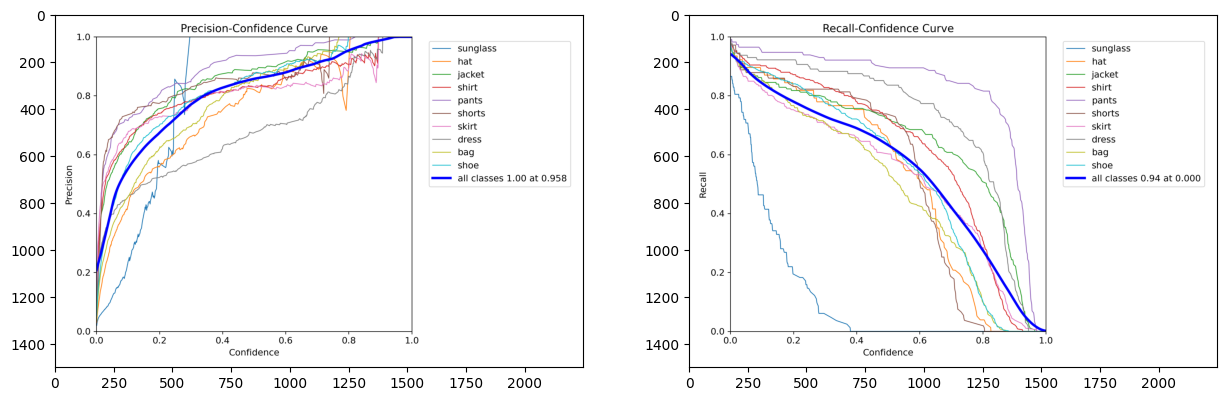

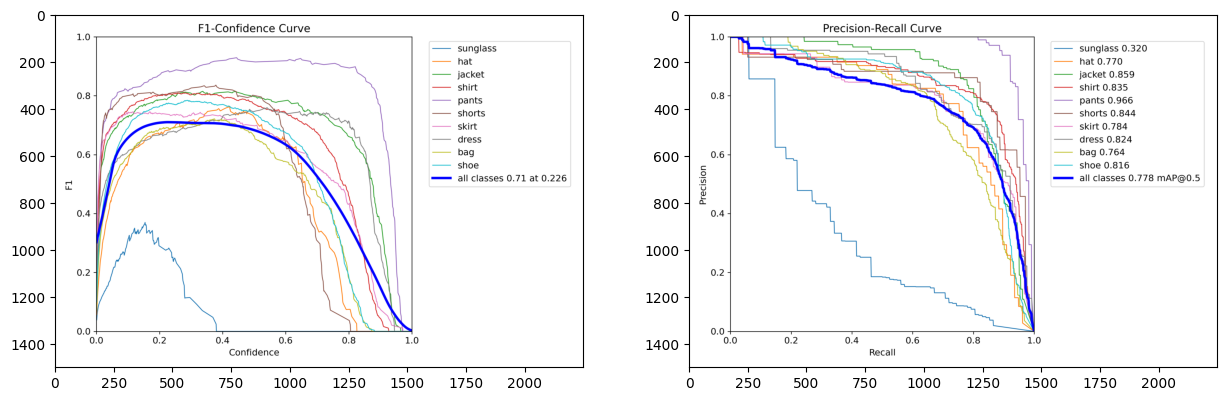

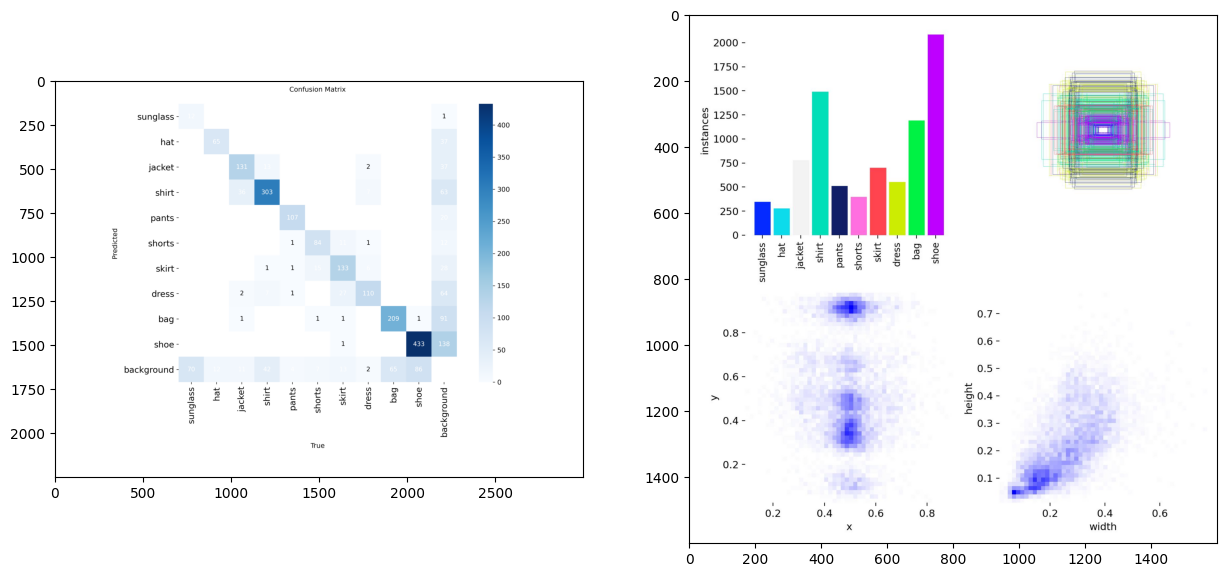

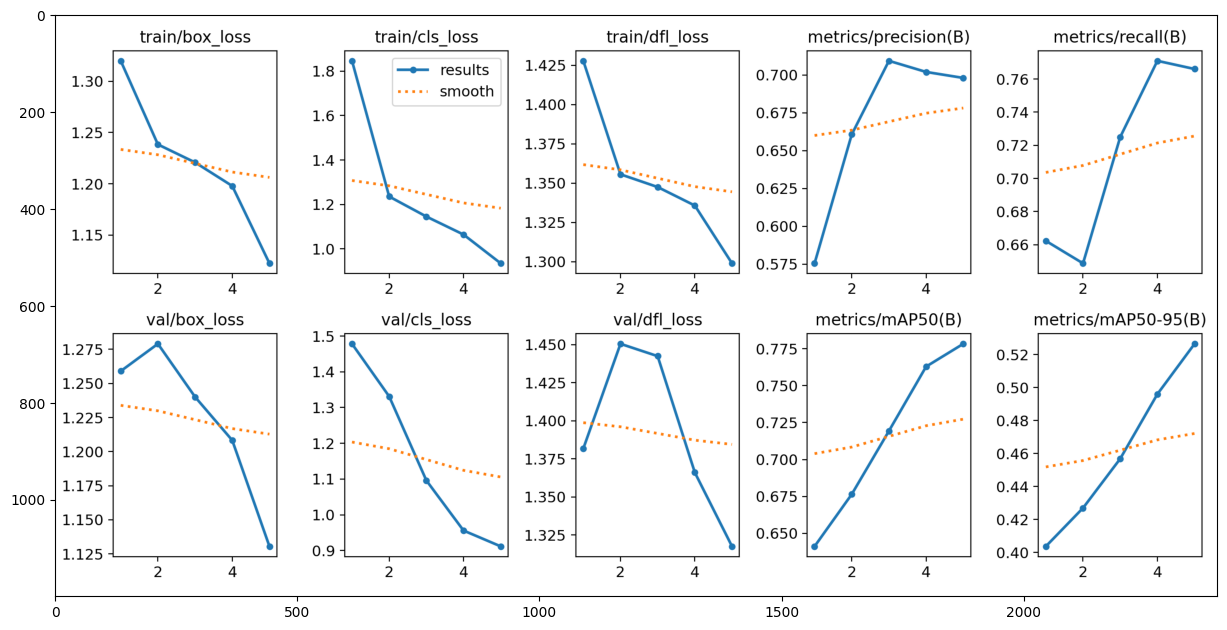

In [14]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [16]:
i=model.predict(source='frames/frame_0000.jpg', conf=0.4, save=True, line_thickness=2)

WARNING 'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 d:\Noel\flickd\frames\frame_0000.jpg: 640x384 1 dress, 199.3ms
Speed: 27.3ms preprocess, 199.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\train3
